# SeedStudio Grove Temperature Sensor

This notebook contains an implementation of SeedStudio Grove Temperature Sensor on the PYNQ-Z2 board.

## Setup:

1. Connect SeeedStudio Base Shield board on Arduino headers.
2. Connect SeeedStudio Grove Temperature Sensor to A1 header.

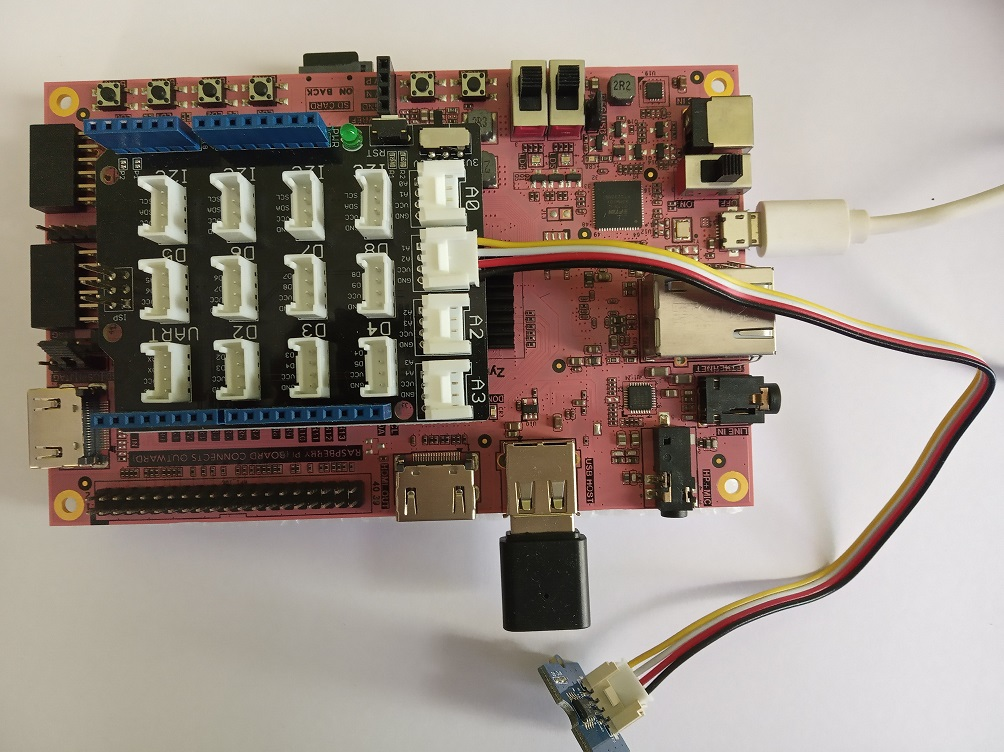


In [1]:
from pynq.overlays.base import BaseOverlay
from pynq_peripherals import ArduinoSEEEDGroveAdapter
base = BaseOverlay('base.bit')

Enter number of seconds for reading the Temperature:  180


Temperature(C):  [24.32, 24.53, 24.54, 24.33, 24.4, 24.39, 24.42, 24.43, 24.46, 24.43, 24.42, 24.41, 24.4, 24.39, 24.38, 24.34, 24.38, 24.24, 24.45, 24.36, 24.26, 24.36, 24.35, 24.34, 24.37, 24.35, 24.24, 24.35, 24.34, 24.32, 24.35, 24.32, 24.37, 24.35, 24.36, 24.34, 24.34, 24.27, 24.36, 24.38, 24.27, 24.36, 24.37, 24.28, 24.36, 24.35, 24.25, 24.33, 24.36, 24.21, 24.34, 24.29, 24.3, 24.31, 24.31, 24.36, 24.31, 24.31, 24.31, 24.31, 24.21, 24.27, 24.23, 24.18, 24.28, 24.24, 24.19, 24.24, 24.37, 24.16, 24.25, 24.26, 24.27, 24.23, 24.26, 24.28, 24.32, 24.27, 24.27, 24.28, 24.58, 24.28, 24.28, 24.18, 24.3, 24.28, 24.19, 24.23, 24.27, 24.16, 24.28, 24.29, 24.17, 24.27, 24.27, 24.26, 24.3, 24.29, 24.27, 24.28, 24.24, 24.28, 24.3, 24.24, 24.25, 24.23, 24.16, 24.24, 24.22, 24.14, 24.24, 24.21, 24.12, 24.21, 24.23, 24.14, 24.23, 24.35, 24.19, 24.2, 24.19, 24.19, 24.16, 24.21, 24.2, 24.18, 24.2, 24.18, 24.17, 24.04, 24.2, 24.18, 24.1, 24.16, 24.18, 24.04, 24.15, 24.13, 24.02, 24.12, 24.12, 24.14,

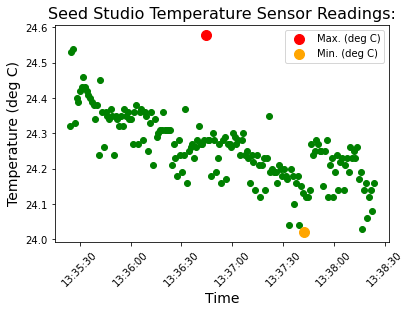

In [2]:
# Import packages
import math  # For log functions
from time import sleep
from datetime import datetime
import pytz
import matplotlib.pyplot as plt
import numpy as np

# Configure SEED Studio Base shield and Temperature Sensor
adapter = ArduinoSEEEDGroveAdapter(base.ARDUINO, A1='grove_temperature')
temperatureSensor = adapter.A1

bValue = 4275             # B Value of the thermistor
baseResistance = 100000   # Base Resistance (100K @ 25C)

# Get the number of Seconds for recording
noOfSeconds = int(input('Enter number of seconds for reading the Temperature: '))         

temperatureList = []      # An empty list for collecting the temperature values
timeList = []             # An empty list for collecting the time stamps

# Collect NTC thermistor data
for samples in range (noOfSeconds):
    adcValue = temperatureSensor.get_temperature()
    sleep(1) # wait 1sec

    thermResistance = (float)((1023 / adcValue - 1) * baseResistance)
    
    # Steinhart-Hart Equation for calculating the temperature in Kelvin
    tempCelsius = abs((float)(1 / (math.log(thermResistance / baseResistance) / bValue + 1 / 298.15) - 273.15))
    tempCelsius = round(tempCelsius, 2)
    
    # Add data to temperature list
    temperatureList.append(tempCelsius)
    timeList.append(datetime.now(pytz.timezone('Asia/Kolkata')))
    
print('Temperature(C): ', temperatureList)

# Find the Max and Min temperature values and indexes
tempMax = max(temperatureList)
tempMin = min(temperatureList)

tempMax_index = temperatureList.index(tempMax)
tempMin_index = temperatureList.index(tempMin)

print('Max. Temperature Recorded (deg C): ', tempMax)
print('Min. Temperature Recorded (deg C): ', tempMin)

# Add labels and title
plt.xlabel('Time', size = 14)
plt.ylabel('Temperature (deg C)', size = 14)
plt.title('Seed Studio Temperature Sensor Readings:', size = 16)
plt.xticks(rotation = 45)

# Create the scatter plot with timestamps
plt.scatter(timeList, temperatureList, marker = 'o', color = 'green')
plt.scatter(timeList[tempMax_index], tempMax, color = 'red', s = 100, label = 'Max. (deg C)')
plt.scatter(timeList[tempMin_index], tempMin, color = 'orange', s = 100, label = 'Min. (deg C)')
plt.legend()

# Display the plot
plt.show()

## References:

1. https://www.analog.com/en/design-notes/a-simple-thermistor-interface-to-an-adc.html
2. https://github.com/Xilinx/PYNQ_Peripherals/blob/main/pynq_peripherals/modules/grove_temperature/notebooks/grove_temperature.ipynb